<a href="https://colab.research.google.com/github/soil7/ICS-Assignment-1/blob/main/ICS_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

--- KNN ---
Accuracy: 0.9474
Precision: 0.9577
Recall: 0.9577
F1-score: 0.9577
Confusion Matrix:
[[40  3]
 [ 3 68]]


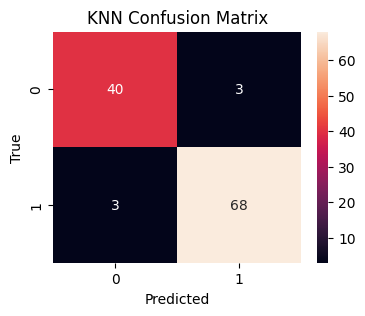

--- Decision Tree ---
Accuracy: 0.9474
Precision: 0.9577
Recall: 0.9577
F1-score: 0.9577
Confusion Matrix:
[[40  3]
 [ 3 68]]


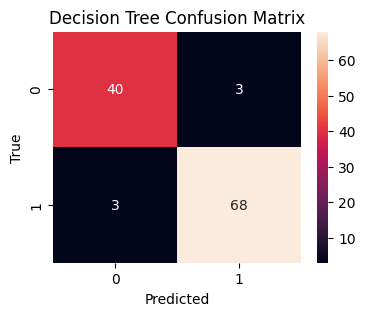

--- Random Forest ---
Accuracy: 0.9649
Precision: 0.9589
Recall: 0.9859
F1-score: 0.9722
Confusion Matrix:
[[40  3]
 [ 1 70]]


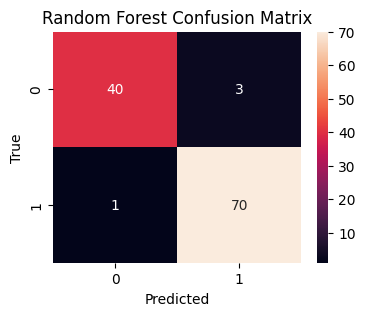


--- Model Comparison ---
           Model  Accuracy  Precision    Recall  F1-score
0            KNN  0.947368   0.957746  0.957746  0.957746
1  Decision Tree  0.947368   0.957746  0.957746  0.957746
2  Random Forest  0.964912   0.958904  0.985915  0.972222

--- KNN Ablation Study ---
   n_neighbors  Accuracy
0            1  0.938596
1            3  0.947368
2            5  0.947368
3            7  0.947368
4            9  0.964912
5           11  0.956140

--- Decision Tree Ablation Study ---
   max_depth  Accuracy
0        NaN  0.947368
1        3.0  0.947368
2        5.0  0.947368
3        7.0  0.947368
4       10.0  0.947368

--- Random Forest Ablation Study ---


,max_depth,min_samples_split,Accuracy
0,NaN,2,0.964912
1,NaN,4,0.964912
2,NaN,6,0.964912
3,3.0,2,0.964912
4,3.0,4,0.964912
5,3.0,6,0.964912
6,5.0,2,0.964912
7,5.0,4,0.964912
8,5.0,6,0.964912
9,7.0,2,0.964912


In [10]:
# prompt: Instructions
# # 1. Dataset:
# Use the Breast Cancer dataset provided by sklearn. It includes 30 features and a binary
# classification task (malignant vs. benign).
# 2. Tasks:
# o Data Preprocessing:
# § Load the Breast Cancer dataset using load_breast_cancer from sklearn.
# § Partition the data into an 80% training set and a 20% test set.
# § Scale the features using StandardScaler for KNN.
# o Model Training:
# § Train three classifiers:
# 1. K-Nearest Neighbors (KNN): Start with n_neighbors=5.
# 2. Decision Tree: Use the default settings initially, then experiment
# with max_depth.
# 3. Random Forest: Start with 100 trees (n_estimators=100) and
# explore the effect of different max_depth or min_samples_split.
# o Evaluation:
# § Use the following metrics to evaluate performance:
# § Accuracy
# § Precision
# § Recall
# § F1-score
# § Include a confusion matrix for each model.
# § Compare the results across the models in a tabular or graphical format.
# o Ablation Study:
# § Modify key hyperparameters (e.g., n_neighbors for KNN, max_depth for
# Decision Trees and Random Forest) and observe the impact on
# performance.
# 3. Deliverables:
# 1. Code Submission:
# § Upload all your code to a GitHub repository. Provide the repository link in
# your report. Ensure your code is well-documented with comments.
# 2. Report Submission:
# § Write a maximum 4-page report. Submit the report as a PDF file through
# the course platform.
# ```
# # This is formatted as code

# Import necessary libraries
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Breast Cancer dataset
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize models
knn_model = KNeighborsClassifier(n_neighbors=5)
dt_model = DecisionTreeClassifier(random_state=42)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the models
knn_model.fit(X_train_scaled, y_train)
dt_model.fit(X_train_scaled, y_train)
rf_model.fit(X_train_scaled, y_train)

# Make predictions
knn_pred = knn_model.predict(X_test_scaled)
dt_pred = dt_model.predict(X_test_scaled)
rf_pred = rf_model.predict(X_test_scaled)

# Evaluate the models
def evaluate_model(y_true, y_pred, model_name):
  accuracy = accuracy_score(y_true, y_pred)
  precision = precision_score(y_true, y_pred)
  recall = recall_score(y_true, y_pred)
  f1 = f1_score(y_true, y_pred)
  cm = confusion_matrix(y_true, y_pred)

  print(f"--- {model_name} ---")
  print(f"Accuracy: {accuracy:.4f}")
  print(f"Precision: {precision:.4f}")
  print(f"Recall: {recall:.4f}")
  print(f"F1-score: {f1:.4f}")
  print("Confusion Matrix:")
  print(cm)

  # Confusion matrix heatmap
  plt.figure(figsize=(4, 3))
  sns.heatmap(cm, annot=True, fmt="d")
  plt.title(f"{model_name} Confusion Matrix")
  plt.xlabel("Predicted")
  plt.ylabel("True")
  plt.show()

  return {
      "Model": model_name,
      "Accuracy": accuracy,
      "Precision": precision,
      "Recall": recall,
      "F1-score": f1
  }

# Evaluate and store results
results = []
results.append(evaluate_model(y_test, knn_pred, "KNN"))
results.append(evaluate_model(y_test, dt_pred, "Decision Tree"))
results.append(evaluate_model(y_test, rf_pred, "Random Forest"))

# Compare the results
results_df = pd.DataFrame(results)
print("\n--- Model Comparison ---")
print(results_df)

# Ablation Study
# KNN - Vary n_neighbors
knn_results = []
for n in [1, 3, 5, 7, 9, 11]:
  knn = KNeighborsClassifier(n_neighbors=n)
  knn.fit(X_train_scaled, y_train)
  pred = knn.predict(X_test_scaled)
  accuracy = accuracy_score(y_test, pred)
  knn_results.append({"n_neighbors": n, "Accuracy": accuracy})

knn_df = pd.DataFrame(knn_results)
print("\n--- KNN Ablation Study ---")
print(knn_df)

# Decision Tree - Vary max_depth
dt_results = []
for depth in [None, 3, 5, 7, 10]:
  dt = DecisionTreeClassifier(max_depth=depth, random_state=42)
  dt.fit(X_train_scaled, y_train)
  pred = dt.predict(X_test_scaled)
  accuracy = accuracy_score(y_test, pred)
  dt_results.append({"max_depth": depth, "Accuracy": accuracy})

dt_df = pd.DataFrame(dt_results)
print("\n--- Decision Tree Ablation Study ---")
print(dt_df)

# Random Forest - Vary max_depth and min_samples_split
rf_results = []
for depth in [None, 3, 5, 7]:
  for samples in [2, 4, 6]:
    rf = RandomForestClassifier(n_estimators=100, max_depth=depth, min_samples_split=samples, random_state=42)
    rf.fit(X_train_scaled, y_train)
    pred = rf.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, pred)
    rf_results.append({"max_depth": depth, "min_samples_split": samples, "Accuracy": accuracy})

rf_df = pd.DataFrame(rf_results)
print("\n--- Random Forest Ablation Study ---")
rf_df



1. Dataset:
Use the Breast Cancer dataset provided by sklearn. It includes 30 features and a binary
classification task (malignant vs. benign).
2. Tasks:
Data Preprocessing:
- Load the Breast Cancer dataset using load_breast_cancer from sklearn.
- Partition the data into an 80% training set and a 20% test set.
- Scale the features using StandardScaler for KNN.

```
# This is formatted as code
```



1. Dataset:
Use the Breast Cancer dataset provided by sklearn. It includes 30 features and a binary
classification task (malignant vs. benign).
2. Tasks:
Data Preprocessing:
- Load the Breast Cancer dataset using load_breast_cancer from sklearn.
- Partition the data into an 80% training set and a 20% test set.
- Scale the features using StandardScaler for KNN.

```
# This is formatted as code
```



In [15]:
# prompt: 1. Dataset:
# Use the Breast Cancer dataset provided by sklearn. It includes 30 features and a binary
# classification task (malignant vs. benign).
# 2. Tasks:
# Data Preprocessing:
# - Load the Breast Cancer dataset using load_breast_cancer from sklearn.
# - Partition the data into an 80% training set and a 20% test set.
# - Scale the features using StandardScaler for KNN.
# ```
# # This is formatted as code
# ```

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the Breast Cancer dataset
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)
print("Shape of X_train_scaled:", X_train_scaled.shape)
print("Shape of X_test_scaled:", X_test_scaled.shape)



In [3]:
#1. Import Required Libraries
#load breast cancer data
from sklearn.datasets import load_breast_cancer
# to improve the model efficiency and generalisation, split the data for train and test
from sklearn.model_selection import train_test_split
# to hormonize the data all the numeric values are scaled to mean 0 and standard deviaiton or variance 1
from sklearn.preprocessing import StandardScaler
#for numerical calcualtions
import numpy as np
import pandas as pd

2. #  importing the dataset and giving a new name
ics = load_breast_cancer()
features = pd.DataFrame(ics.data, columns=ics.feature_names)
labels = pd.Series(ics.target)
# dividing the datset into tranin and split
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size=0.2, random_state=42)
# check if th data is divided in corret number of rows
print(f"Training Set: {features_train.shape}, {labels_train.shape}")
print(f"Test Set: {features_test.shape}, {labels_test.shape}")

Training Set: (455, 30), (455,)
Test Set: (114, 30), (114,)


In [5]:
# StandardScale object is created
scale = StandardScaler()
# Transforming the train features
features_train_scaled = scale.fit_transform(features_train)
# Transforming the test features
features_test_scaled = scale.transform(features_test)

3. #Model Training:
#Train three classifiers:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
# Starting KNN  with 5 neighbors
model_knn = KNeighborsClassifier(n_neighbors=5)
# Training the KNN model1 with the scaled training data
model_knn.fit(features_train_scaled, labels_train)
#prediciting on the test data
pred_knn = model_knn.predict(features_test_scaled)
#  evaluation
accuracy = accuracy_score(labels_test, pred_knn)
precision = precision_score(labels_test, pred_knn)
recall = recall_score(labels_test, pred_knn)
f1 = f1_score(labels_test, pred_knn)
conf_matrix = confusion_matrix(labels_test, pred_knn)
#results
print("K-Nearest Neighbors (KNN) Model Performance:")
print(f"Accuracy: {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1-score: {f1:.3f}")
print("Confusion Matrix:")
print(conf_matrix)

K-Nearest Neighbors (KNN) Model Performance:
Accuracy: 0.947
Precision: 0.958
Recall: 0.958
F1-score: 0.958
Confusion Matrix:
[[40  3]
 [ 3 68]]


In [6]:
from sklearn.tree import DecisionTreeClassifier
# Decision Tree classifier (default settings)
model_dt_default = DecisionTreeClassifier()
# Training the Decision Tree model with scaled training data
model_dt_default.fit(features_train_scaled, labels_train)
#prediciting on the test data
predict_dt_default = model_dt_default.predict(features_test_scaled)
# Evaluate
accuracy_model_dt_default = accuracy_score(labels_test, predict_dt_default)
precision_model_dt_default = precision_score(labels_test, predict_dt_default)
recall_model_dt_default = recall_score(labels_test, predict_dt_default)
f1_model_dt_default = f1_score(labels_test, predict_dt_default)
conf_matrix_model_dt_default = confusion_matrix(labels_test, predict_dt_default)
# Results
print("Decision Tree Model Performance (Default Settings):")
print(f"Accuracy: {accuracy_model_dt_default:.3f}")
print(f"Precision: {precision_model_dt_default:.3f}")
print(f"Recall: {recall_model_dt_default:.3f}")
print(f"F1-score: {f1_model_dt_default:.3f}")
print("Confusion Matrix:")
print(conf_matrix_model_dt_default)

Decision Tree Model Performance (Default Settings):
Accuracy: 0.939
Precision: 0.957
Recall: 0.944
F1-score: 0.950
Confusion Matrix:
[[40  3]
 [ 4 67]]


In [7]:
from sklearn.ensemble import RandomForestClassifier
#  Random Forest classifier
model_rf_default = RandomForestClassifier(n_estimators=100)
# Training the model with the scaled training data
model_rf_default.fit(features_train_scaled, labels_train)
# Predicitng on the test data
predict_rf_default = model_rf_default.predict(features_test_scaled)
# Evaluate
accuracy_model_rf_default= accuracy_score(labels_test, predict_rf_default)
precision_model_rf_default = precision_score(labels_test, predict_rf_default)
recall_model_rf_default = recall_score(labels_test, predict_rf_default)
f1__model_rf_default = f1_score(labels_test, predict_rf_default)
conf_matrix_model_rf_default = confusion_matrix(labels_test, predict_rf_default)
# Results
print("Random Forest Model Performance (Default Settings):")
print(f"Accuracy: {accuracy_model_rf_default:.3f}")
print(f"Precision: {precision_model_rf_default:.3f}")
print(f"Recall: {recall_model_rf_default:.3f}")
print(f"F1-score: {f1__model_rf_default:.3f}")
print("Confusion Matrix:")
print(conf_matrix_model_rf_default)


Random Forest Model Performance (Default Settings):
Accuracy: 0.965
Precision: 0.959
Recall: 0.986
F1-score: 0.972
Confusion Matrix:
[[40  3]
 [ 1 70]]
